In [17]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt


In [18]:
def lv(x, y, a, b, k, l):
    return np.array([k*x-a*x*y, -l*y+b*x*y])

def euler(x, y, a, b, k, l, dt):
    
    t = 0
    res = [np.array([x, y])]
    
    for _ in range(int(100 / dt)):
        x0 = res[-1][0]
        y0 = res[-1][1]
        newval = res[-1] + lv(x0, y0, a, b, k, l)*dt
        res.append(newval)
        
    return res

def rk(x, y, a, b, k, l, dt):

    t = 0
    res = [np.array([x, y])]
    
    for _ in range(int(100 / dt)):
        
        x0 = res[-1][0]
        y0 = res[-1][1]
        
        k1 = lv(x0, y0, a, b, k, l)
        k2 = lv(x0 + 0.5 * dt * k1[0], y0 + 0.5 * dt * k1[1], a, b, k, l)
        k3 = lv(x0 + 0.5 * dt * k2[0], y0 + 0.5 * dt * k2[1], a, b, k, l)
        k4 = lv(x0 + dt * k3[0], y0 + dt * k3[1], a, b, k, l)

        newx = x0 + (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) * dt / 6
        newy = y0 + (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) * dt / 6
    
        newval = np.array([newx, newy])
        res.append(newval)
        
    return res
def plot_euler(x0, y0, a, b, k, l):
    
    dt = [1, 1/4, 1/16, 1/256, 1/1024, 1/4096]
    plt.figure(figsize=(10,6))
    
    for delta in dt:

        result = euler(x0, y0, a, b, k, l, delta)
        df = pd.DataFrame(result, columns = ['prey', 'predator'])
        
        plt.plot(df['prey'], df['predator'], label=f'{round(delta, 4)} step size')
        
    plt.title('Euler Lotka-Volterra Phase Space')
    plt.xlabel('prey')
    plt.ylabel('predator')
    plt.xlim(0, 500)
    plt.ylim(0, 500)
    plt.legend(loc='upper right')
    
    plt.show()
    
def plot_rk(x0, y0, a, b, k, l):
    
    dt = [5, 2, 1, 1/4, 1/16, 1/256]
    plt.figure(figsize=(10,6))
    
    for delta in dt:

        result = rk(x0, y0, a, b, k, l, delta)
        df = pd.DataFrame(result, columns = ['prey', 'predator'])
        
        plt.plot(df['prey'], df['predator'], label=f'{round(delta, 4)} step size')
        
    plt.title('R-K Lotka-Volterra Phase Space')
    plt.xlabel('prey')
    plt.ylabel('predator')
    plt.xlim(0, 500)
    plt.ylim(0, 500)
    plt.legend(loc='upper right')
    
    plt.show()

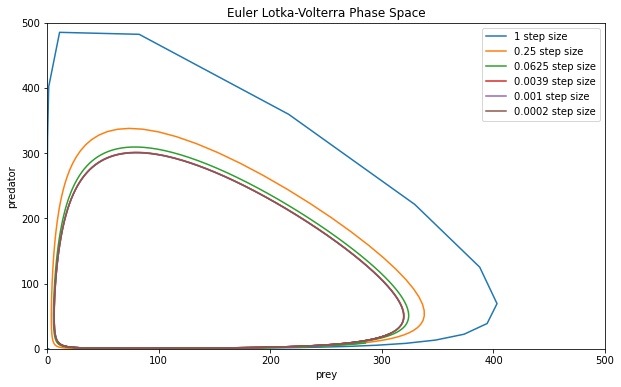

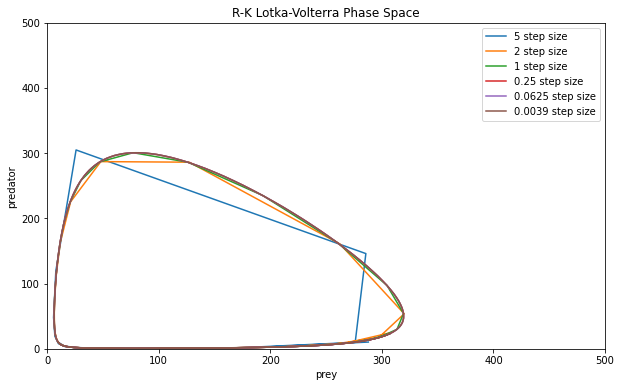

In [19]:
plot_euler(10, 10, 0.002, 0.0025, 0.1, 0.2)
plot_rk(10, 10, 0.002, 0.0025, 0.1, 0.2)

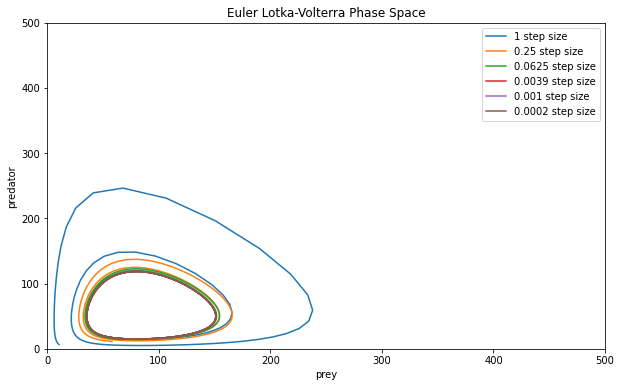

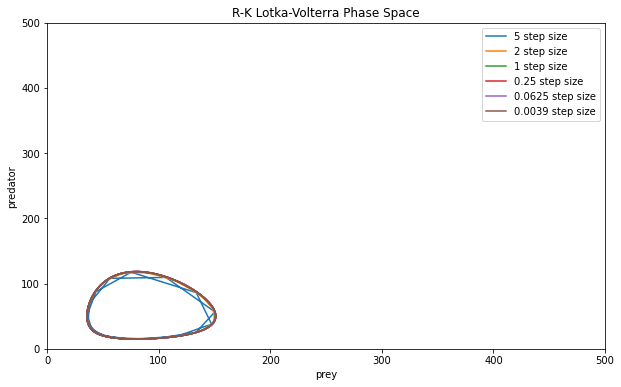

In [20]:
plot_euler(50, 20, 0.002, 0.0025, 0.1, 0.2)
plot_rk(50, 20, 0.002, 0.0025, 0.1, 0.2)

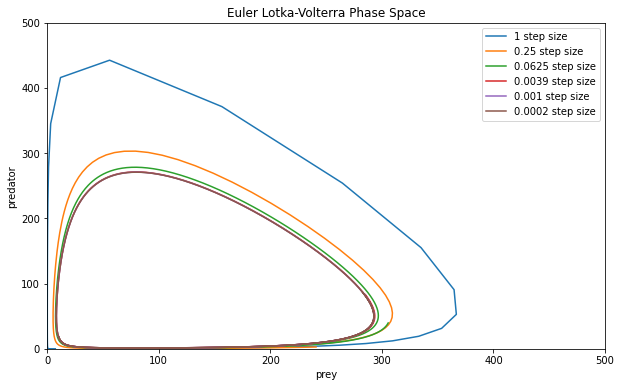

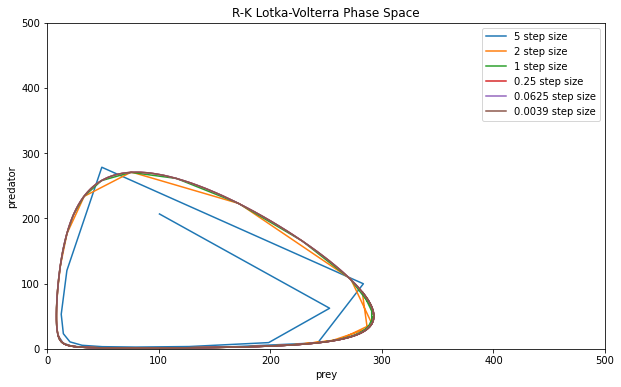

In [21]:
plot_euler(10, 20, 0.002, 0.0025, 0.1, 0.2)
plot_rk(10, 20, 0.002, 0.0025, 0.1, 0.2)

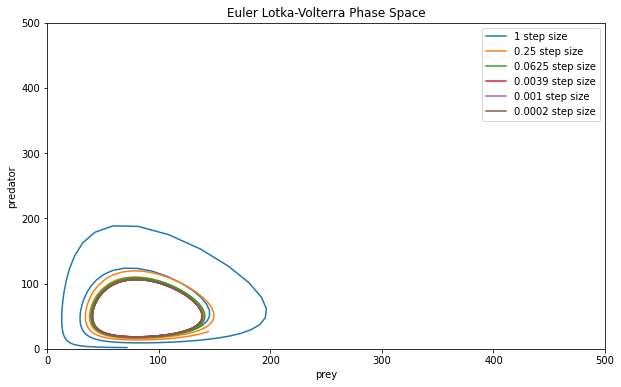

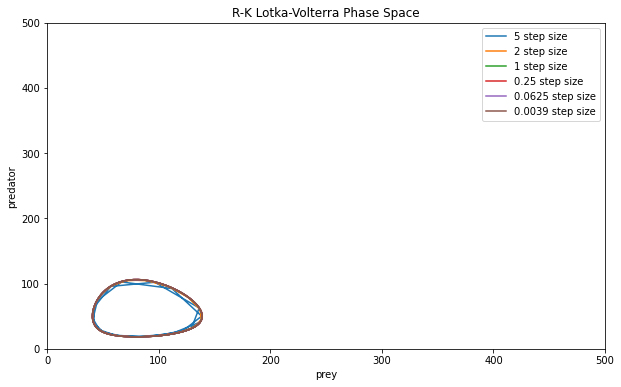

In [22]:
plot_euler(100, 20, 0.002, 0.0025, 0.1, 0.2)
plot_rk(100, 20, 0.002, 0.0025, 0.1, 0.2)